**Firstly**, we need to see the distribution of the data along the various classification. If there is class imbalance, we need balance the data in order to the best results

In [0]:
import numpy as np 
import pandas as pd 
import os 
import cv2
import json
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from PIL import Image
import math
import seaborn as sns
from collections import defaultdict
from pathlib import Path
from tqdm import tqdm 

# Get Data


In [0]:
 # Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
path = '/content/drive/My Drive/project/data_main/'

In [0]:
train_df = pd.read_csv(path + 'train.csv')

# Number of Image in each Class

In [0]:
df = train_df
### Get the weights for class imbalance 
class_dict = defaultdict(int)
kind_class_dict = defaultdict(int)

no_defects_num = 0
defects_num = 0

for col in range(0, len(df), 4):
    img_names = [str(i).split("_")[0] for i in df.iloc[col:col+4, 0].values]
    if not (img_names[0] == img_names[1] == img_names[2] == img_names[3]):
        raise ValueError
        
    labels = df.iloc[col:col+4, 1]
    if labels.isna().all():
        no_defects_num += 1
    else:
        defects_num += 1
    
    kind_class_dict[sum(labels.isna().values == False)] += 1
        
    for idx, label in enumerate(labels.isna().values.tolist()):  
        if label == False:
            class_dict[idx+1] += 1 

defaultdict(int, {1: 897, 2: 247, 3: 5150, 4: 802})

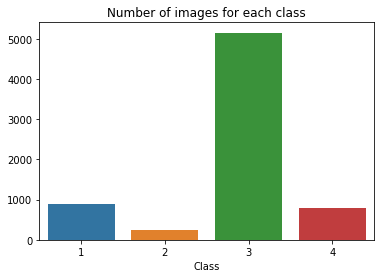

In [0]:
fig, ax = plt.subplots()
sns.barplot(x=list(class_dict.keys()), y=list(class_dict.values()), ax=ax)
ax.set_title("Number of images for each class")
ax.set_xlabel("Class")
class_dict

# Number of Class in each Image

defaultdict(int, {0: 5902, 1: 6239, 2: 425, 3: 2})

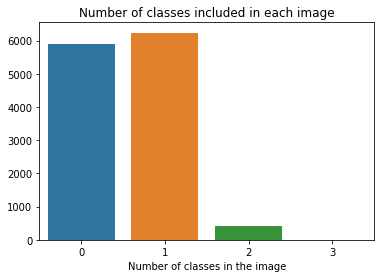

In [0]:
fig, ax = plt.subplots()
sns.barplot(x=list(kind_class_dict.keys()), y=list(kind_class_dict.values()), ax=ax)
ax.set_title("Number of classes included in each image");
ax.set_xlabel("Number of classes in the image")
kind_class_dict

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import os
import numpy as np 
import pandas as pd 
import cv2
import os

In [0]:
train = train_df
train = train[ train['EncodedPixels'].notnull() ]
train.head()

ImageId_ClassId                                      EncodedPixels
0   0002cc93b.jpg_1  29102 12 29346 24 29602 24 29858 24 30114 24 3...
18  0007a71bf.jpg_3  18661 28 18863 82 19091 110 19347 110 19603 11...
20  000a4bcdd.jpg_1  37607 3 37858 8 38108 14 38359 20 38610 25 388...
27  000f6bf48.jpg_4  131973 1 132228 4 132483 6 132738 8 132993 11 ...
30  0014fce06.jpg_3  229501 11 229741 33 229981 55 230221 77 230468...

# Show Image and Mask

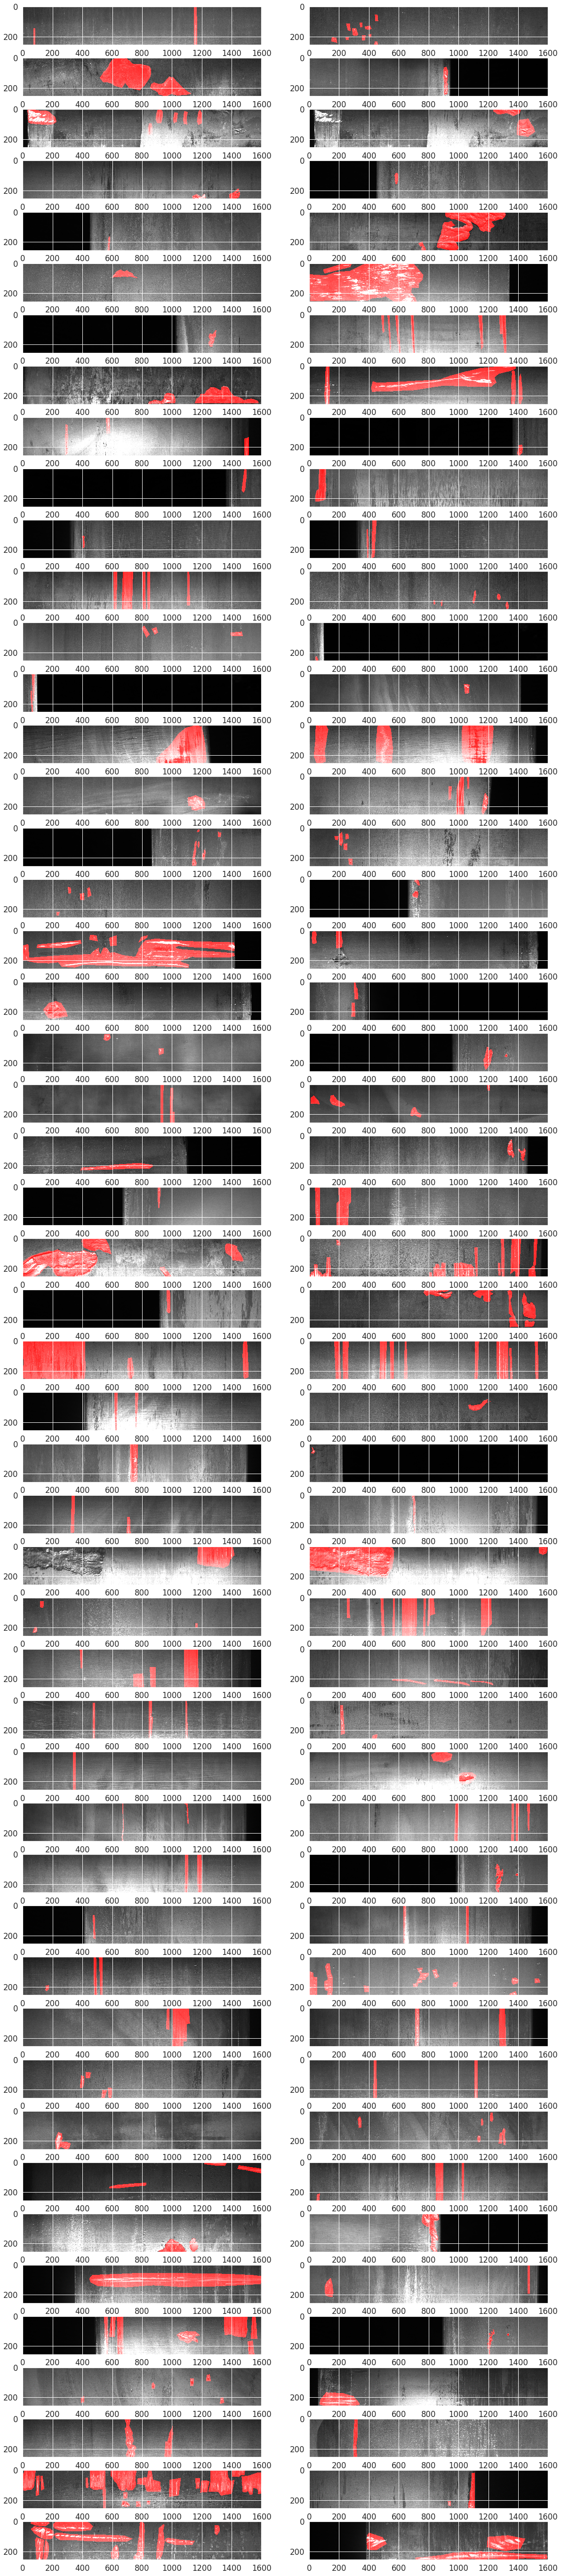

In [0]:
def rle2mask(rle, imgshape):
    width = imgshape[0]
    height= imgshape[1]
    
    mask= np.zeros( width*height ).astype(np.uint8)
    
    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]
    lengths = array[1::2]

    current_position = 0
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])] = 1
        current_position += lengths[index]
        
    return np.flipud( np.rot90( mask.reshape(height,width), k=1 ) )

fig=plt.figure(figsize=(20,100))
columns = 2
rows = 50
for i in range(1, 100+1):
    fig.add_subplot(rows, columns, i)
    
    fn = train['ImageId_ClassId'].iloc[i].split('_')[0]
    img = cv2.imread((path +'train_images/')+fn)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = rle2mask( train['EncodedPixels'].iloc[i], img.shape  )
    img[mask==1,0] = 255
    
    plt.imshow(img)
plt.show() 
